### DATASET PARSING

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

In [ ]:
url = "https://en.wikipedia.org/w/api.php"

params = {
    "action": "parse",
    "format": "json",
    "page": "Wikipedia:WikiProject_Books/List_of_books_by_title",
    "prop": "text",
}


response = requests.get(url, params=params)
data = response.json()
html_content = data["parse"]["text"]["*"]
soup = BeautifulSoup(html_content, 'html.parser')
toc_div = soup.find("div", {"class": "toc"})
links = toc_div.find_all("a")

links_list = list()

for link in links:
  if "href" in link.attrs:
    #print(link.text, "https://en.wikipedia.org" + link["href"])
    links_list.append("https://en.wikipedia.org" + link["href"])


print(links_list)

['https://en.wikipedia.orghttps://en.wikipedia.org/w/index.php?title=Wikipedia:WikiProject_Books/List_of_books_by_title&action=edit&section=0', 'https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Books/List_of_books_by_title:_0%E2%80%939', 'https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Books/List_of_books_by_title:_A', 'https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Books/List_of_books_by_title:_B', 'https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Books/List_of_books_by_title:_C', 'https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Books/List_of_books_by_title:_D', 'https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Books/List_of_books_by_title:_E', 'https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Books/List_of_books_by_title:_F', 'https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Books/List_of_books_by_title:_G', 'https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Books/List_of_books_by_title:_H', 'https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Books/List

In [ ]:
len(links_list)

28

In [ ]:
books_list = list()

for i in range (1, len(links_list)): #начинаем со 2 ссылки, тк первая относится не к списку книг, там ссылка на раздел редактирования
  response = requests.get(links_list[i])
  soup = BeautifulSoup(response.content, 'html.parser')
  book_items = soup.find_all("li")


  for item in book_items:
    link = item.find("a")
    if link and "href" in link.attrs:
      full_url = "https://en.wikipedia.org" + link["href"]
      books_list.append(full_url)

  time.sleep(1)



In [ ]:
len(books_list)

6556

In [ ]:
df = pd.DataFrame(columns=['book_name', 'author', 'year_of_publishing', 'plot', 'genre', 'description', 'page_number'])

In [ ]:
def extract_book_details(book_url):

    book_details = {
        "book_name": None,
        "author": None,
        "year_of_publishing": None,
        "plot": None,
        "genre": None,
        "description": None,
        "page_number": None
    }

    time.sleep(1)

    try:
      response = requests.get(book_url)
      soup = BeautifulSoup(response.content, 'html.parser')
    except:
      return None

    book_name_tag = soup.find("h1", {"id": "firstHeading"})
    if book_name_tag:
      book_details["book_name"] = book_name_tag.text.strip()

    infobox = soup.find("table", {"class": "infobox"})
    #print(infobox)
    #if book_name_tag != None:
      #print(book_name_tag.text.strip())
    if infobox:
      author_row = infobox.find("th", string="Author")
      if author_row:
        book_details["author"] = author_row.find_next("td").text.strip()

      year_row = infobox.find("th", string=lambda x: x and any(term.lower() in x.lower() for term in ["published", "publication date"]))
      if year_row:
        book_details["year_of_publishing"] = year_row.find_next("td").text.strip()

      genre_row = infobox.find("th", string="Genre")
      if genre_row:
        book_details["genre"] = genre_row.find_next("td").text.strip()

      pages_row = infobox.find("th", string="Pages")
      if pages_row:
        book_details["page_number"] = pages_row.find_next("td").text.strip()

    description_text = ""

    start_point = infobox if infobox else book_name_tag

    if start_point:
      next_sibling = start_point.find_next_sibling()
      while next_sibling and next_sibling.name not in ["div", "h2"]:
        if next_sibling.name == "p":
          description_text += next_sibling.text.strip() + "\n"
        next_sibling = next_sibling.find_next_sibling()

    book_details["description"] = description_text.strip()


    plot_heading = soup.select_one("h2[id*=Plot], h2[id*=Overview], h2[id*=Content]")
    if plot_heading:
      plot_div = plot_heading.find_parent("div", {"class": "mw-heading"})

      if plot_div:
        plot_text = ""
        for sibling in plot_div.find_next_siblings():
          if sibling.name == "p":
            plot_text += sibling.text + "\n"
          elif sibling.name == "h2":
            break
        book_details["plot"] = plot_text.strip()

    return book_details

i=0

for book_url in books_list:
  details = extract_book_details(book_url)
  i+=1
  if details != None:
    new_row = pd.DataFrame([details])
    df = pd.concat([df, new_row], ignore_index=True)
  #else:
    #print(book_url)

  if i % 50 == 0:
    print(f"Processed {i} books")


Processed 50 books
Processed 100 books
Processed 150 books
Processed 200 books
Processed 250 books
Processed 300 books
Processed 350 books
Processed 400 books
Processed 450 books
Processed 500 books
Processed 550 books
Processed 600 books
Processed 650 books
Processed 700 books
Processed 750 books
Processed 800 books
Processed 850 books
Processed 900 books
Processed 950 books
Processed 1000 books
Processed 1050 books
Processed 1100 books
Processed 1150 books
Processed 1200 books
Processed 1250 books
Processed 1300 books
Processed 1350 books
Processed 1400 books
Processed 1450 books
Processed 1500 books
Processed 1550 books
Processed 1600 books
Processed 1650 books
Processed 1700 books
Processed 1750 books
Processed 1800 books
Processed 1850 books
Processed 1900 books
Processed 1950 books
Processed 2000 books
Processed 2050 books
Processed 2100 books
Processed 2150 books
Processed 2200 books
Processed 2250 books
Processed 2300 books
Processed 2350 books
Processed 2400 books
Processed 24

**не забыть разобраться с парсингом картинок и мб спарсить еще персонажей**

In [ ]:
df.tail(20)

,book_name,author,year_of_publishing,plot,genre,description,page_number
6239,Marek Halter,None,None,None,None,Marek Halter (born 27 January 1936) is a Polis...,None
6240,Chelsey Minnis,None,None,None,None,,None
6241,Zlata's Diary,Zlata Filipović,1992,Zlata Filipović was given a diary in September...,None,Zlata's Diary: A Child's Life in Sarajevo (ISB...,None
6242,Zodiac (True Crime Book),None,None,None,None,,None
6243,Zoe's Tale,John Scalzi,2008 (Tor Books),Zoe's Tale is a parallel retelling of Scalzi's...,Science fiction,Zoe's Tale is a science fiction novel by Ameri...,366[1]
6244,Making Out (book series),"K.A. Applegate, Michael Grant",None,None,"Young Adult, Romance",Making Out is a series of young adult novels b...,None
6245,The Zombie Survival Guide,Max Brooks,"September 16, 2003",The book is divided into seven sections and an...,"Humor,[1] Horror, Informative",The Zombie Survival Guide is the first book wr...,272
6246,Zone One,Colson Whitehead,2011,"A virus has laid waste to civilization, turnin...","Horror, post-apocalyptic fiction",Zone One is a 2011 novel by American author Co...,"259 (hardback), 322 (paperback)"
6247,Zoo City,Lauren Beukes,1 June 2010 (South Africa)2 September 2010 (UK...,Zoo City is set in an alternate version of the...,None,Zoo City is a 2010 science fiction novel by So...,None
6248,The Zookeeper's Wife,Diane Ackerman,"September 4, 2007","In the 1930s, Jan Żabiński is the director of ...",HistoryBiographyNon-fiction,The Zookeeper's Wife is a non-fiction book wri...,288


In [ ]:
len(df)

6259

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   book_name           5609 non-null   object
 1   author              2899 non-null   object
 2   year_of_publishing  2967 non-null   object
 3   plot                2298 non-null   object
 4   genre               2257 non-null   object
 5   description         6259 non-null   object
 6   page_number         2234 non-null   object
dtypes: object(7)
memory usage: 342.4+ KB


In [ ]:
df.to_csv("book_details.csv", index=False)

In [ ]:
#import pandas as pd

In [ ]:
#df = pd.read_csv("/content/book_details (3).csv")

In [ ]:
columns_to_check = ['author', 'year_of_publishing', 'genre', 'page_number']

df.dropna(subset=columns_to_check, how='all', inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Columns': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage': missing_percent.values
}).sort_values('Percentage', ascending=False)

In [ ]:
missing_both = df[df['description'].isna() & df['plot'].isna()].shape[0]
missing_both_percent = (missing_both / len(df)) * 100

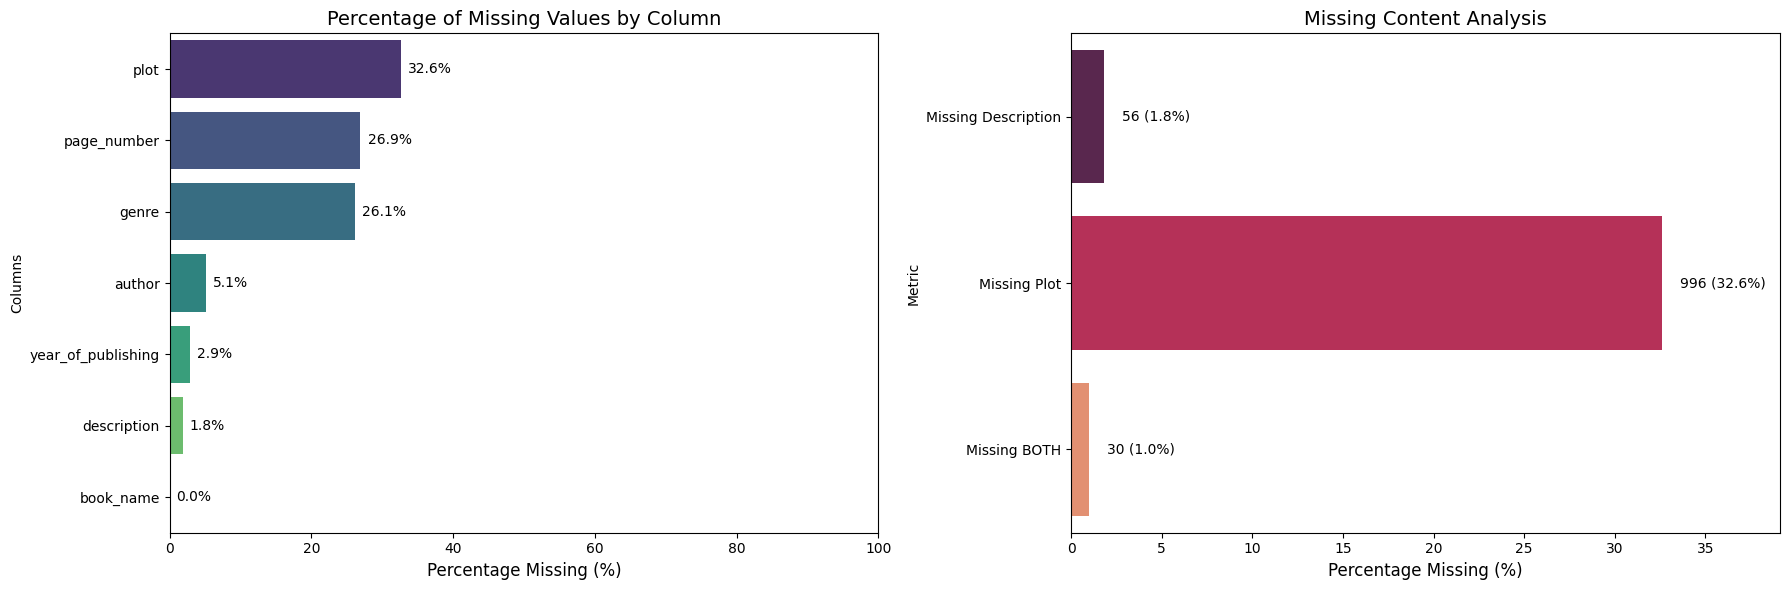


Summary Statistics:
Total books: 3056
Books missing name: 0 (0.0%)
Books missing description: 56 (1.8%)
Books missing plot: 996 (32.6%)
Books missing BOTH description AND plot: 30 (1.0%)


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='Percentage', y='Columns', data=missing_df, palette='viridis', hue='Columns', ax=ax1)
for p in ax1.patches:
    width = p.get_width()
    ax1.text(width + 1,
             p.get_y() + p.get_height()/2.,
             f'{width:.1f}%',
             ha='left',
             va='center')
ax1.set_title('Percentage of Missing Values by Column', fontsize=14)
ax1.set_xlabel('Percentage Missing (%)', fontsize=12)
ax1.set_xlim(0, 100)

combined_data = pd.DataFrame({
    'Metric': ['Missing Description', 'Missing Plot', 'Missing BOTH'],
    'Count': [missing_values['description'], missing_values['plot'], missing_both],
    'Percentage': [missing_percent['description'], missing_percent['plot'], missing_both_percent]
})

sns.barplot(x='Percentage', y='Metric', data=combined_data, palette='rocket', hue='Metric', ax=ax2)
for p in ax2.patches:
    width = p.get_width()
    count = combined_data.loc[combined_data['Percentage'] == width, 'Count'].values[0]
    ax2.text(width + 1,
             p.get_y() + p.get_height()/2.,
             f'{count} ({width:.1f}%)',
             ha='left',
             va='center')
ax2.set_title('Missing Content Analysis', fontsize=14)
ax2.set_xlabel('Percentage Missing (%)', fontsize=12)
ax2.set_xlim(0, max(combined_data['Percentage']) * 1.2)

plt.tight_layout()
plt.show()

print(f"\nSummary Statistics:")
print(f"Total books: {len(df)}")
print(f"Books missing name: {missing_values['book_name']} ({missing_percent['book_name']:.1f}%)")
print(f"Books missing description: {missing_values['description']} ({missing_percent['description']:.1f}%)")
print(f"Books missing plot: {missing_values['plot']} ({missing_percent['plot']:.1f}%)")
print(f"Books missing BOTH description AND plot: {missing_both} ({missing_both_percent:.1f}%)")

In [ ]:
mask = ~(df['description'].isna() & df['plot'].isna())

In [ ]:
df = df[mask]

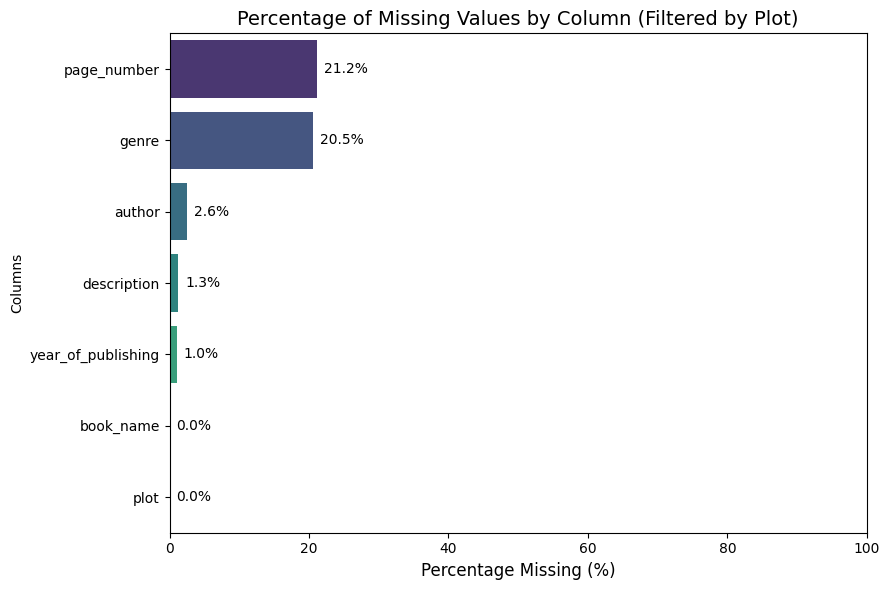


Summary Statistics (Filtered by Plot):
Total books with filled plot: 2060
Books missing name: 0 (0.0%)
Books missing author: 53 (2.6%)
Books missing genre: 423 (20.5%)
Books missing year: 21 (1.0%)
Books missing description: 26 (1.3%)
Books missing plot: 0 (0.0%)


In [ ]:
filtered_df = df[~df['plot'].isna()]

missing_values_filtered = filtered_df.isnull().sum()
missing_percent_filtered = (missing_values_filtered / len(filtered_df)) * 100
missing_df_filtered = pd.DataFrame({
    'Columns': missing_values_filtered.index,
    'Missing Values': missing_values_filtered.values,
    'Percentage': missing_percent_filtered.values
}).sort_values('Percentage', ascending=False)

fig, (ax1) = plt.subplots(1, 1, figsize=(9, 6))

sns.barplot(x='Percentage', y='Columns', data=missing_df_filtered, palette='viridis', hue='Columns', ax=ax1)
for p in ax1.patches:
    width = p.get_width()
    ax1.text(width + 1,
             p.get_y() + p.get_height()/2.,
             f'{width:.1f}%',
             ha='left',
             va='center')
ax1.set_title('Percentage of Missing Values by Column (Filtered by Plot)', fontsize=14)
ax1.set_xlabel('Percentage Missing (%)', fontsize=12)
ax1.set_xlim(0, 100)


plt.tight_layout()
plt.show()

print("\nSummary Statistics (Filtered by Plot):")
print(f"Total books with filled plot: {len(filtered_df)}")
print(f"Books missing name: {missing_values_filtered['book_name']} ({missing_percent_filtered['book_name']:.1f}%)")
print(f"Books missing author: {missing_values_filtered['author']} ({missing_percent_filtered['author']:.1f}%)")
print(f"Books missing genre: {missing_values_filtered['genre']} ({missing_percent_filtered['genre']:.1f}%)")
print(f"Books missing year: {missing_values_filtered['year_of_publishing']} ({missing_percent_filtered['year_of_publishing']:.1f}%)")
print(f"Books missing description: {missing_values_filtered['description']} ({missing_percent_filtered['description']:.1f}%)")
print(f"Books missing plot: {missing_values_filtered['plot']} ({missing_percent_filtered['plot']:.1f}%)")

In [ ]:
df.dropna(subset="plot", inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2060 entries, 63 to 6253
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   book_name           2060 non-null   object
 1   author              2007 non-null   object
 2   year_of_publishing  2039 non-null   object
 3   plot                2060 non-null   object
 4   genre               1637 non-null   object
 5   description         2034 non-null   object
 6   page_number         1623 non-null   object
dtypes: object(7)
memory usage: 128.8+ KB


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.head()

,book_name,author,year_of_publishing,plot,genre,description,page_number
0,The 12.30 from Croydon,Freeman Wills Crofts,1934,"Set in Yorkshire and London in 1933, The 12.30...",Mystery,The 12.30 from Croydon (U.S. title: Wilful and...,NaN
1,The Final Unfinished Voyage of Jack Aubrey,Patrick O'Brian,2004,The story begins with Surprise in the Strait o...,Historical novel,The Final Unfinished Voyage of Jack Aubrey is ...,"144 first edition, hardback"
2,30 Days in Sydney,Peter Carey,"July 15, 2010 (2010-07-15)","The book takes the form of an impressionistic,...",NaN,30 Days in Sydney is a book written by Austral...,256
3,The Thirty-Nine Steps,John Buchan,1915[1],"The story's narrator, Richard Hannay, arrives ...",Adventure novel,The Thirty-Nine Steps is a 1915 adventure nove...,253[1]
4,334 (novel),Thomas M. Disch,1972 (MacGibbon & Kee),The future in 334 has brought few technologica...,"Dystopian, science fiction",334 is a 1972 dystopian science fiction novel ...,201


In [ ]:
df.to_csv("cleaned_book_details.csv", index=False)

In [ ]:
df["plot"][11]

'The opening chapters of 2061 gradually explain the events that have taken place in the interim years. The new sun, dubbed "Lucifer", has transformed the moons of the former Jupiter: Io is a volcanic hellhole, Europa an ocean world shrouded by clouds, and Ganymede a temperate world that the human race is colonizing. Large-scale interplanetary travel is now commercially viable with muon-catalyzed fusion-powered spacecraft. Humanity is wary of sending spacecraft close to Europa despite its fascinating mysteries, including the appearance of a large mountain, dubbed "Mount Zeus", on its surface. On Earth, a period of relative peace has evolved among the United States, Soviet Union and China, although a non-violent revolution has taken place in South Africa (now the United States of Southern Africa or USSA); the white population has fled, taking most of the country\'s wealth with them and leaving the black population to \nrebuild the economy, which they do in a matter of weeks thanks to the